In [20]:
import csv
import pprint

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as ml
import seaborn as sns
import plotly
import warnings
from scipy import stats


data = pd.read_csv('/content/master.csv')

In [21]:
data["HDI for year"].replace(np.nan,0, inplace=True)

In [22]:
south_korea = data[data.country == 'Republic of Korea']

In [23]:
south_korea = south_korea[south_korea.year <= 2013]

In [24]:
south_korea.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
20230,Republic of Korea,1985,male,75+ years,42,154800,27.13,Republic of Korea1985,0.0,"100,273,097,170",2731,G.I. Generation
20231,Republic of Korea,1985,male,55-74 years,393,1498300,26.23,Republic of Korea1985,0.0,"100,273,097,170",2731,G.I. Generation
20232,Republic of Korea,1985,male,35-54 years,903,4285700,21.07,Republic of Korea1985,0.0,"100,273,097,170",2731,Silent
20233,Republic of Korea,1985,male,25-34 years,655,3616800,18.11,Republic of Korea1985,0.0,"100,273,097,170",2731,Boomers
20234,Republic of Korea,1985,male,15-24 years,678,4413000,15.36,Republic of Korea1985,0.0,"100,273,097,170",2731,Generation X
20235,Republic of Korea,1985,female,75+ years,38,370700,10.25,Republic of Korea1985,0.0,"100,273,097,170",2731,G.I. Generation
20236,Republic of Korea,1985,female,55-74 years,161,2000500,8.05,Republic of Korea1985,0.0,"100,273,097,170",2731,G.I. Generation
20237,Republic of Korea,1985,female,15-24 years,296,4148300,7.14,Republic of Korea1985,0.0,"100,273,097,170",2731,Generation X
20238,Republic of Korea,1985,female,25-34 years,228,3568800,6.39,Republic of Korea1985,0.0,"100,273,097,170",2731,Boomers
20239,Republic of Korea,1985,female,35-54 years,262,4267400,6.14,Republic of Korea1985,0.0,"100,273,097,170",2731,Silent


Text(0.5, 1.0, 'Suicides number in Korea over time (1985 ~ 2013)')

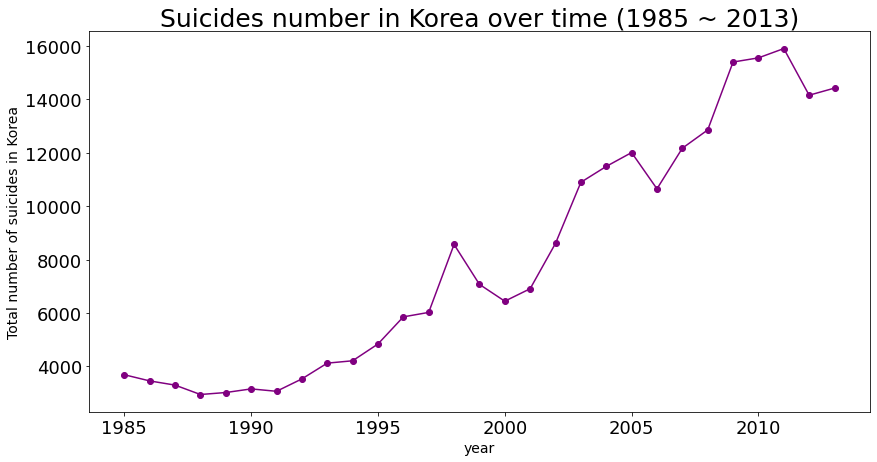

In [34]:
year = south_korea.groupby('year').year.unique()



totalpyear = pd.DataFrame(south_korea.groupby('year').suicides_no.sum())

plt.figure(figsize=(14,7))
plt.plot(year.index, totalpyear, marker = 'o', color = 'purple')
plt.xlabel('year', fontsize=14)
plt.ylabel('Total number of suicides in Korea', fontsize=14)
plt.title('Suicides number in Korea over time (1985 ~ 2013)', fontsize=25)

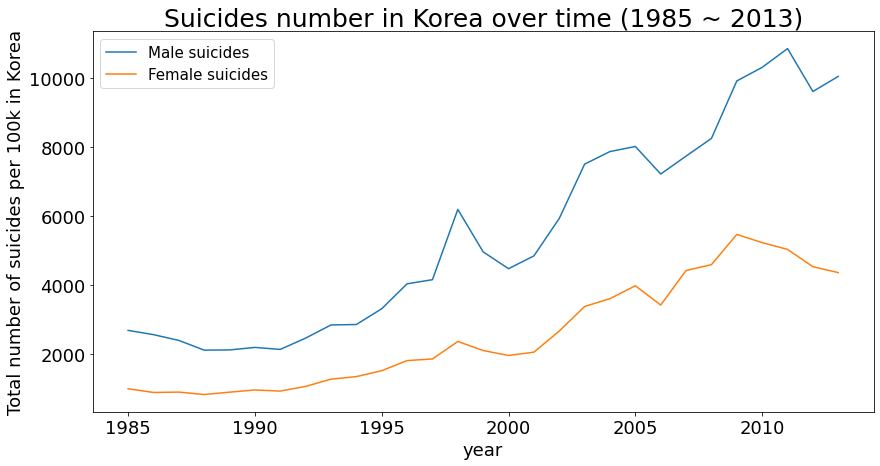

In [26]:
year = south_korea.groupby('year').year.unique()

malesuicides = pd.DataFrame(south_korea[south_korea.sex == 'male'].groupby('year').suicides_no.sum())
femalesuicides = pd.DataFrame(south_korea[south_korea.sex == 'female'].groupby('year').suicides_no.sum())
plt.figure(figsize=(14,7))
plt.title('Suicides number in Korea over time (1985 ~ 2013)', fontsize=25)
plt.plot(year.index, malesuicides,label="Male suicides")
plt.plot(year.index, femalesuicides,label="Female suicides")
plt.xlabel('year', fontsize=18)
plt.ylabel('Total number of suicides per 100k in Korea', fontsize=18)
plt.legend(fontsize=15)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.show()
plt.clf()
plt.cla()
plt.close()

['75+ years' '55-74 years' '35-54 years' '25-34 years' '15-24 years'
 '5-14 years']


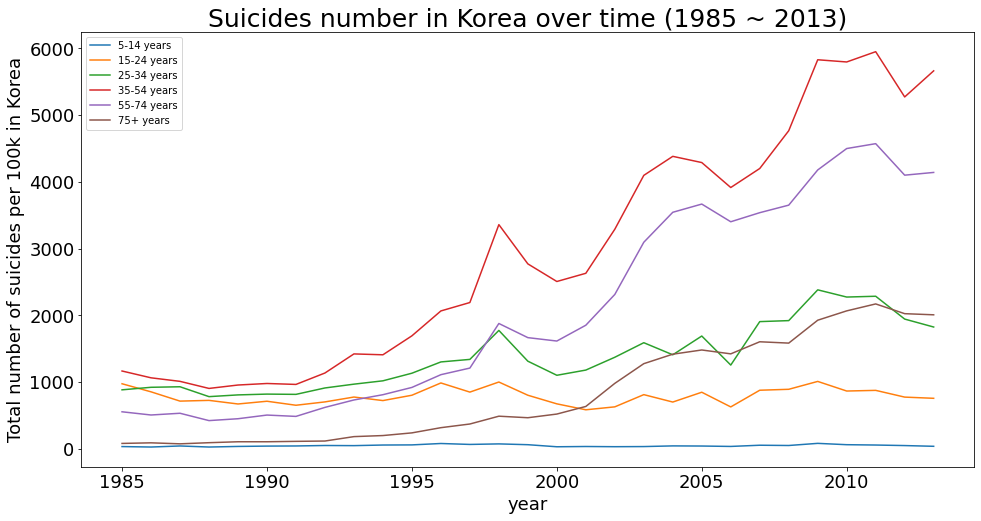

In [27]:
agegroups = south_korea.age.unique()
print(agegroups)

agegone_suicides = pd.DataFrame(south_korea[south_korea.age == '5-14 years'].groupby('year').suicides_no.sum())
agegtwo_suicides = pd.DataFrame(south_korea[south_korea.age == '15-24 years'].groupby('year').suicides_no.sum())
agegthr_suicides = pd.DataFrame(south_korea[south_korea.age == '25-34 years'].groupby('year').suicides_no.sum())
agegfou_suicides = pd.DataFrame(south_korea[south_korea.age == '35-54 years'].groupby('year').suicides_no.sum())
agegfiv_suicides = pd.DataFrame(south_korea[south_korea.age == '55-74 years'].groupby('year').suicides_no.sum())
agegsix_suicides = pd.DataFrame(south_korea[south_korea.age == '75+ years'].groupby('year').suicides_no.sum())

plt.figure(figsize=(16,8))
plt.title('Suicides number in Korea over time (1985 ~ 2013)', fontsize=25)
plt.plot(year.index, agegone_suicides,label='5-14 years')
plt.plot(year.index, agegtwo_suicides,label='15-24 years')
plt.plot(year.index, agegthr_suicides,label='25-34 years')
plt.plot(year.index, agegfou_suicides,label='35-54 years')
plt.plot(year.index, agegfiv_suicides,label='55-74 years')
plt.plot(year.index, agegsix_suicides,label='75+ years')
plt.xlabel('year', fontsize=18)
plt.ylabel('Total number of suicides per 100k in Korea', fontsize=18)
plt.legend(fontsize='medium')
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.show()
plt.clf()
plt.cla()
plt.close()

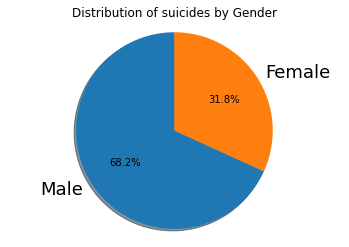

In [28]:
labels = 'Male', 'Female'
values = [np.sum(south_korea[south_korea.sex.eq("male")].suicides_no), np.sum(south_korea[south_korea.sex.eq("female")].suicides_no)]
fig1, ax1 = plt.subplots()
ax1.pie(values,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Distribution of suicides by Gender')
plt.show()
plt.clf()
plt.cla()
plt.close()

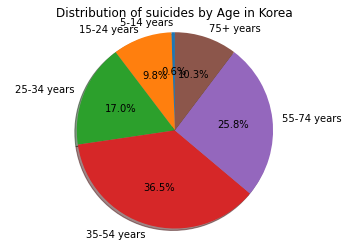

In [29]:
labels = '5-14 years', '15-24 years','25-34 years','35-54 years','55-74 years','75+ years'
values =[]
for eachlab in labels:
    values.append(np.sum(south_korea[south_korea.age.eq(eachlab)].suicides_no))

fig1, ax1 = plt.subplots()
ax1.pie(values,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops=dict(size =10) )
ax1.axis('equal')
plt.title('Distribution of suicides by Age in Korea')
plt.show()
plt.clf()
plt.cla()
plt.close()

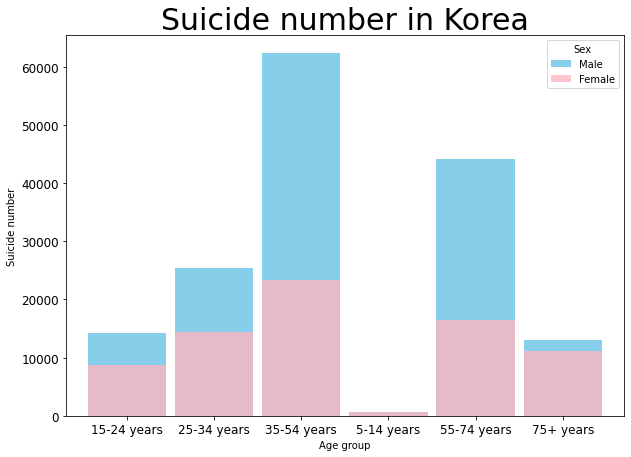

In [36]:
gsd02=pd.DataFrame(south_korea.groupby(['age','sex'])['suicides_no'].sum().unstack())

gsd02.iloc[:,1].plot(kind='bar', color='skyblue', width = 0.9, figsize=(10,7))
gsd02.iloc[:,0].plot(kind='bar', color='lightpink', width = 0.9, alpha = 0.8,figsize=(10,7))
plt.ylabel('Suicide number')
plt.yticks(rotation = 0, fontsize =12)
plt.xlabel('Age group')
plt.xticks(rotation = 0, fontsize =12)
plt.title('Suicide number in Korea', fontsize =30)
plt.legend(['Male','Female'], bbox_to_anchor=(1, 1),title = 'Sex')
plt.show()
plt.clf()
plt.cla()
plt.close()

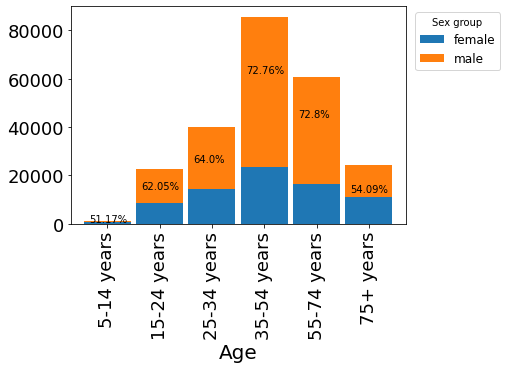

In [37]:
# 성별, 나이별 자살수
age_sex_suicide=pd.DataFrame(south_korea.groupby(['age','sex'])['suicides_no'].sum().unstack())
age_sex_suicide=age_sex_suicide.reindex(labels=labels)

bars=age_sex_suicide.plot(kind='bar', stacked=True, width=0.9)
plt.xlabel('Age', size=20)
plt.legend(bbox_to_anchor=(1.3,1), title = 'Sex group', fontsize=12)
prop=age_sex_suicide.apply(lambda x: x/np.sum(x), axis=1)['male']

cn=0
for i in bars.patches[6:]:
  left, bottom, width, height=i.get_bbox().bounds
  plt.text(left+0.1, height+0.1, str(np.round(prop[cn]*100,2))+'%')
  cn+=1


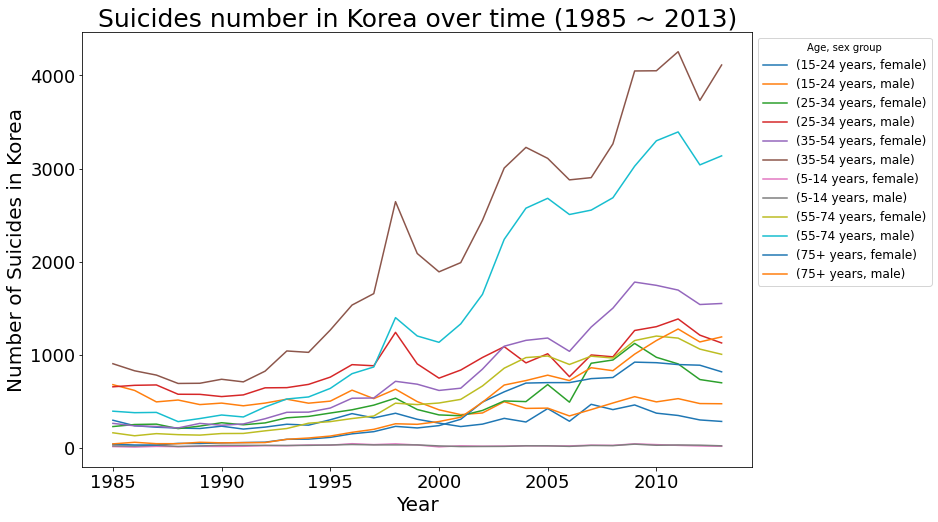

In [33]:
# 연도별, 성별, 나이별 자살수
yr_age_sex_suicide=pd.DataFrame(south_korea.groupby(['age', 'sex', 'year'])['suicides_no'].sum().unstack())
yr_age_sex_suicide=yr_age_sex_suicide.fillna(0)
yr_age_sex_suicide

# male
yr_age_male=pd.DataFrame(yr_age_sex_suicide.iloc[[1,3,5,7,9,11],:])

# female
yr_age_female=pd.DataFrame(yr_age_sex_suicide.iloc[[0,2,4,6,8,10],:])

yr_age_female

yr_age_sex_suicide.T.plot(figsize=(12,8))
plt.title('Suicides number in Korea over time (1985 ~ 2013)', fontsize=25)
plt.xlabel('Year', size=20)
plt.ylabel('Number of Suicides in Korea',size=20)
plt.legend(bbox_to_anchor=(1,1), title = 'Age, sex group', fontsize=12)